<a href="https://colab.research.google.com/github/devt-vari/Jamboree-Education---Linear-Regression/blob/main/jamboree_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jamboree Case Study - Linear Regression

# Problem Statement

**Jamboree recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.**

**Additional View**
- Lin Reg. will also help predict one's chances of admission given the rest of the variables.
- GRE Score, TOEFL Score & CGPA are most important attributes as per Indian Perspective.

# Installing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
jamboree = pd.read_csv('/content/Jamboree_Admission.csv')

In [3]:
jamboree.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
jamboree.drop(["Serial No."], axis = 1, inplace = True)

In [5]:
jamboree.shape

(500, 8)

In [6]:
jamboree.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

- **All the features are numerical**

In [7]:
jamboree.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

- **There is no null values**

In [28]:
jamboree.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


- **While Observing the mean and 50% percentile of data there is no significant difference observed**
- **We can conclude there are no outliers in the dataset.**

In [9]:
jamboree.duplicated().sum()

0

- **There is no duplicated values in the dataset**

In [10]:
jamboree.columns = map(lambda x: x.strip(), jamboree.columns)

# Non-Graphical Analysis

In [11]:
jamboree["University Rating"].value_counts(normalize=True)

3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: University Rating, dtype: float64

- **While observing the university rating. Most of universities average rated.**

In [12]:
jamboree["SOP"].value_counts(normalize=True)

4.0    0.178
3.5    0.176
3.0    0.160
2.5    0.128
4.5    0.126
2.0    0.086
5.0    0.084
1.5    0.050
1.0    0.012
Name: SOP, dtype: float64

In [13]:
jamboree["Research"].value_counts(normalize=True)

1    0.56
0    0.44
Name: Research, dtype: float64

- **Above stats shows there are almost equal distribution among students who did research**

# Graphical Analysis: Univariate

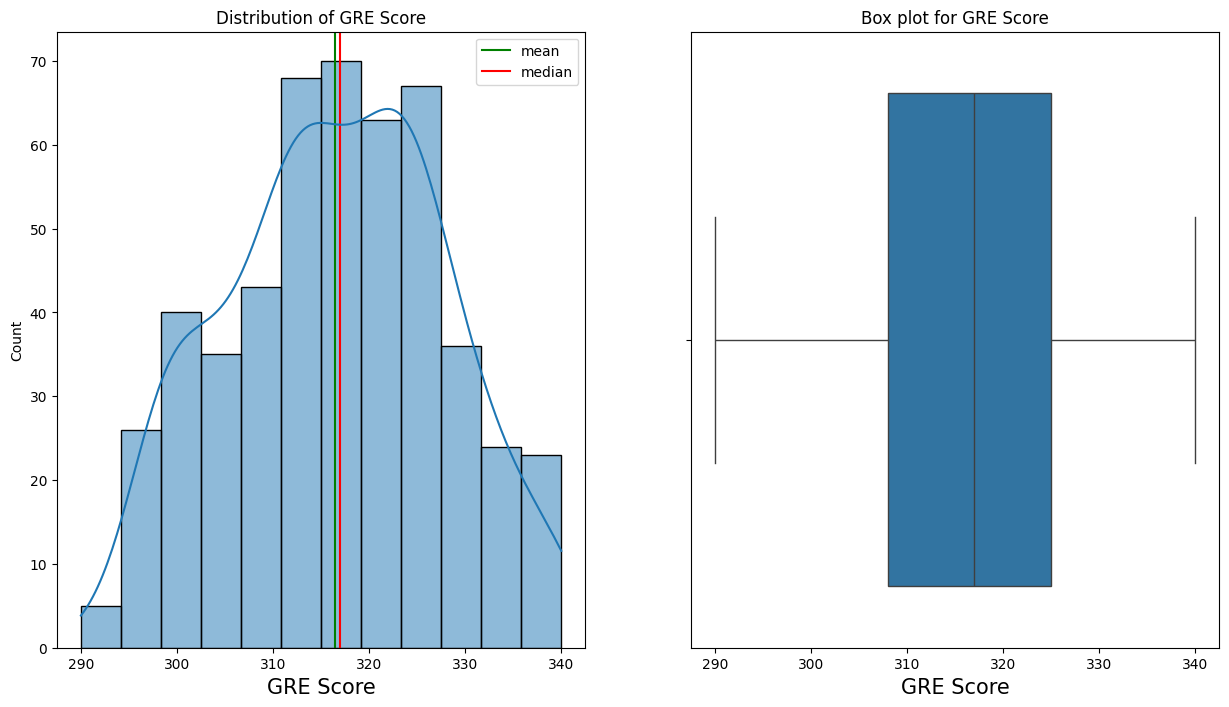

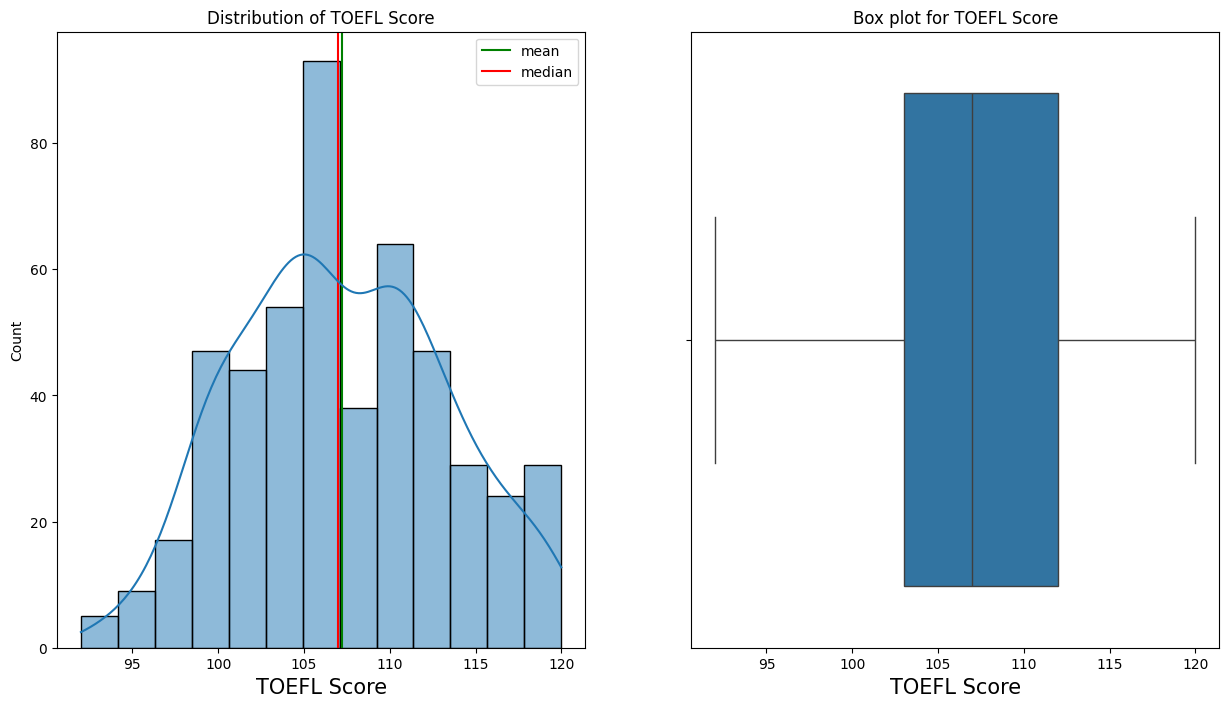

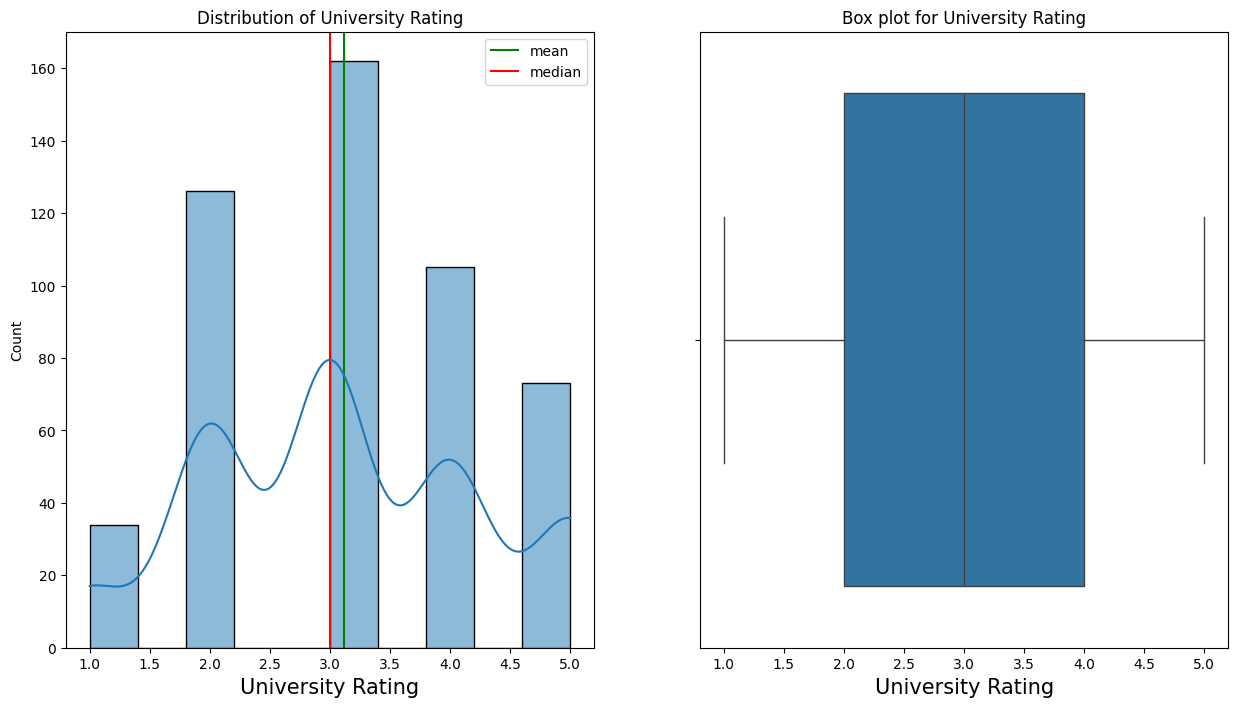

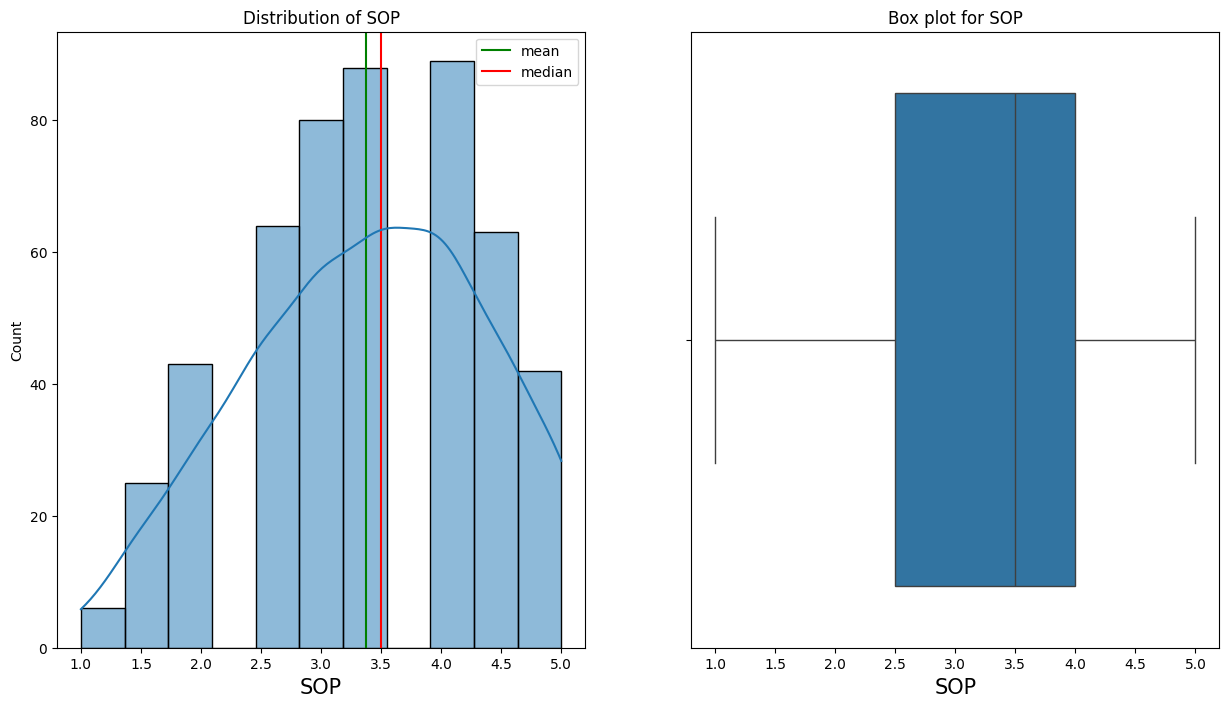

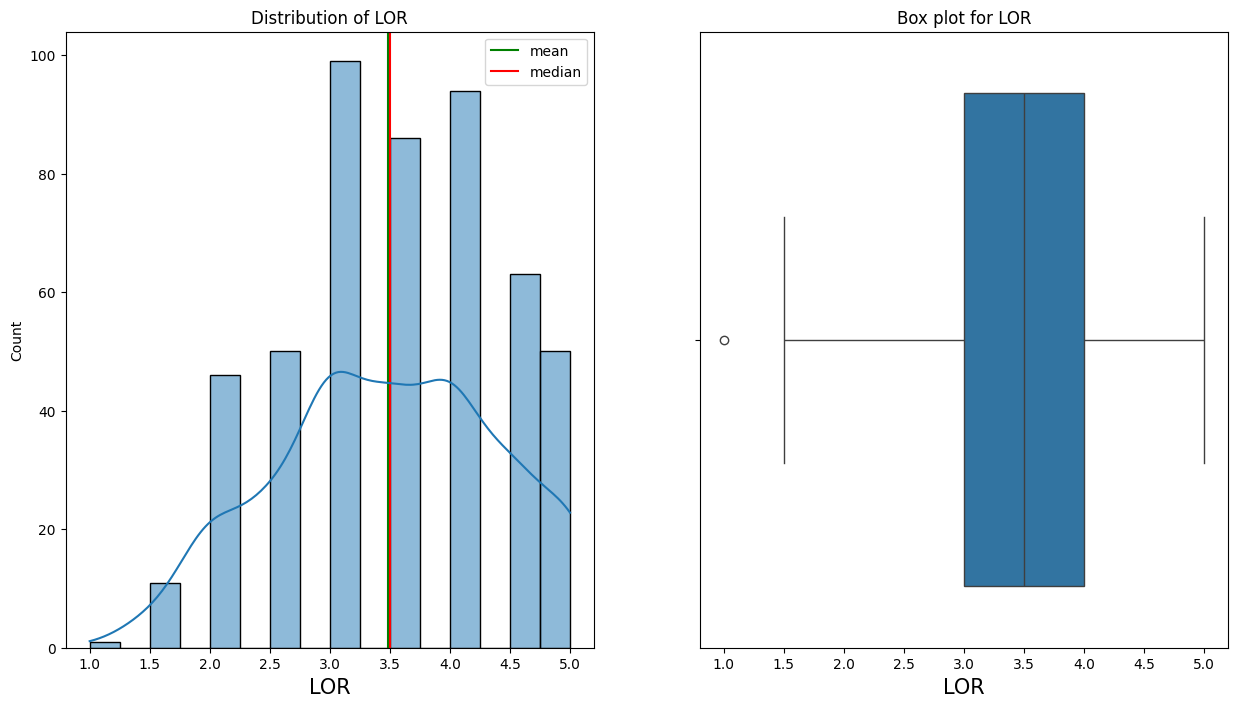

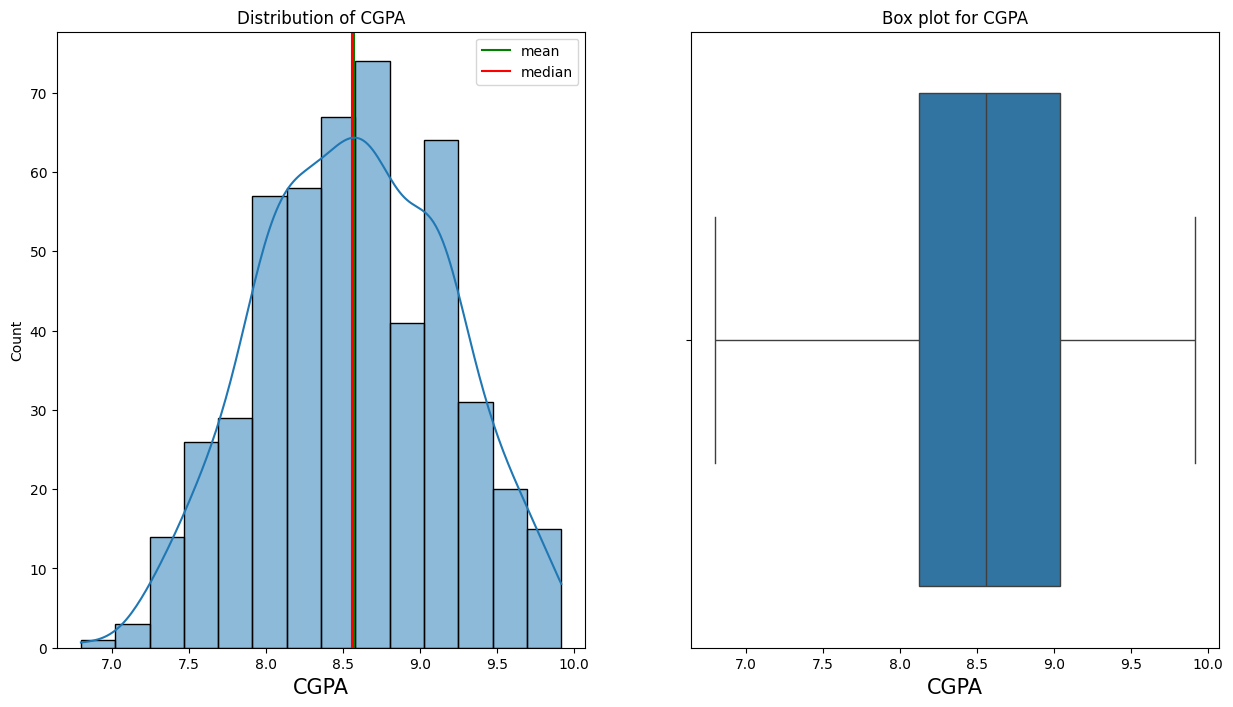

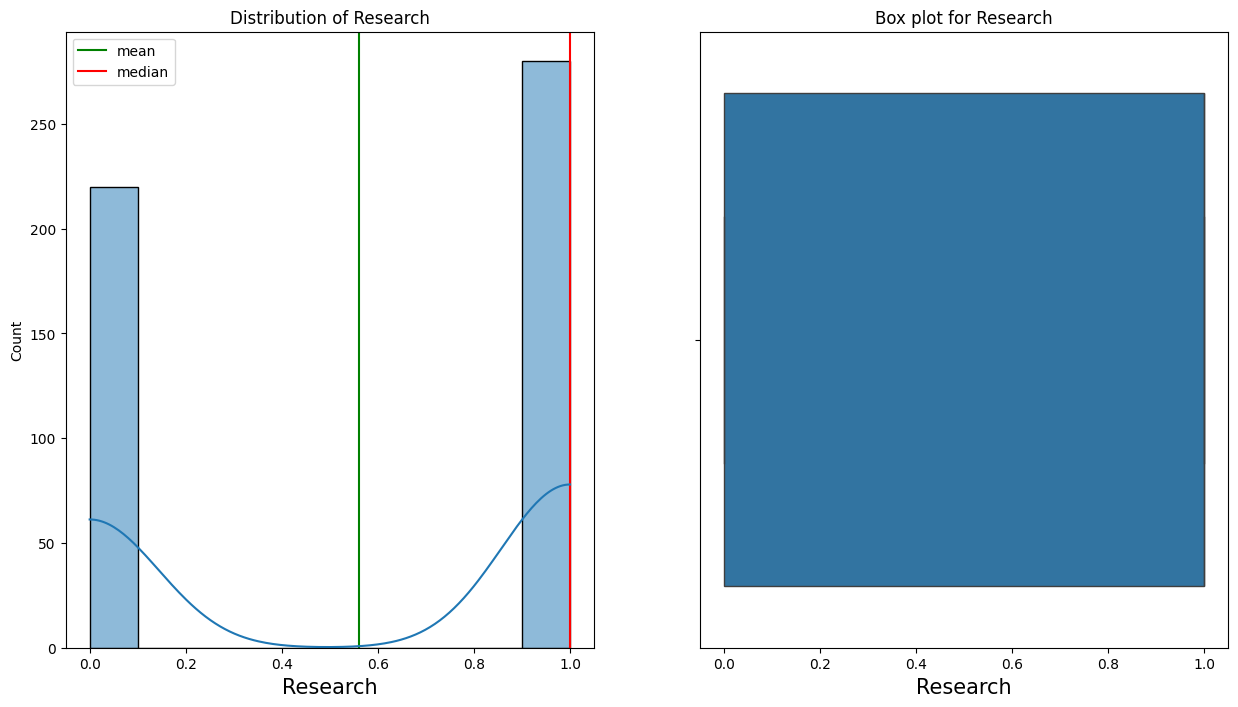

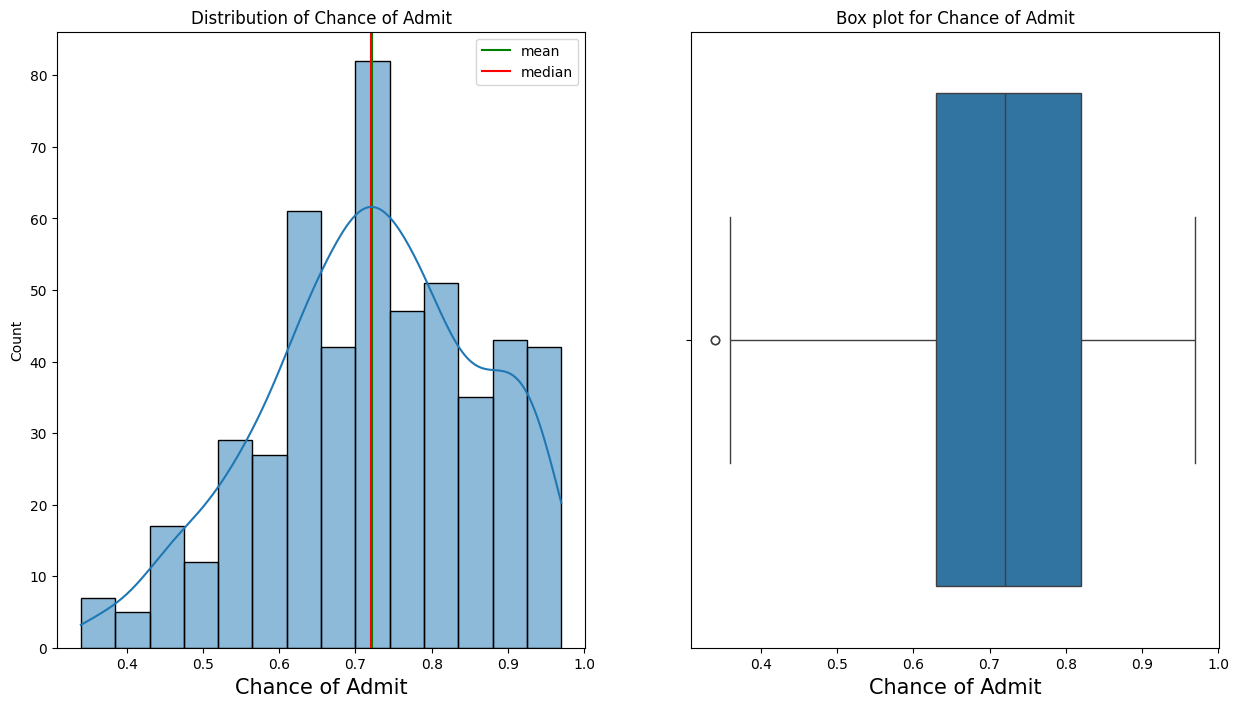

In [14]:
num_cat = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA", "Research", "Chance of Admit"]

for i in range(len(num_cat)):
    fig = plt.figure(figsize = (15, 8))

    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.set_title(f"Distribution of {num_cat[i]}")
    ax1.set_xlabel(ax1.get_xlabel(), fontsize = 15)
    ax1.axvline(jamboree[num_cat[i]].mean(),color="green", label = "mean")
    ax1.axvline(jamboree[num_cat[i]].median(),color="red", label = "median")
    ax1.legend(loc = "best")
    sns.histplot(data=jamboree, x=num_cat[i], ax=ax1, kde=True)

    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.set_title(f"Box plot for {num_cat[i]}")
    ax2.set_xlabel(ax1.get_xlabel(), fontsize = 15)
    sns.boxplot(data = jamboree, x=num_cat[i], ax=ax2)

plt.show()

- **GRE Score Analysis**
    - Distribution of GRE resembles like Gaussian
    - Mean of GRE Score is approx 315
    - There is no outliers detected as mean and median overlaps
- **TOEFL Score Analysis**
    - Distribution of TOEFL somewhat resembles like Gaussian
    - Mean of TOEFL Score is approx 108
    - There is no outliers detected as mean and median overlaps
- **LOR Analysis**
    - Most of the students gets 3.5 out 5
- **CGPA Analysis**
    - Distribution of CGPA resembles like Gaussian
    - Mean of CGPA Score is approx 8.5
    - There is no outliers detected as mean and median overlaps
- **Chance of Admit**
    - Mean of chance of admission is 0.72

# Outliers Detection

- **From the above observation, There is no outliers detected in the dataset**

# Graphical Analysis: Bivariate

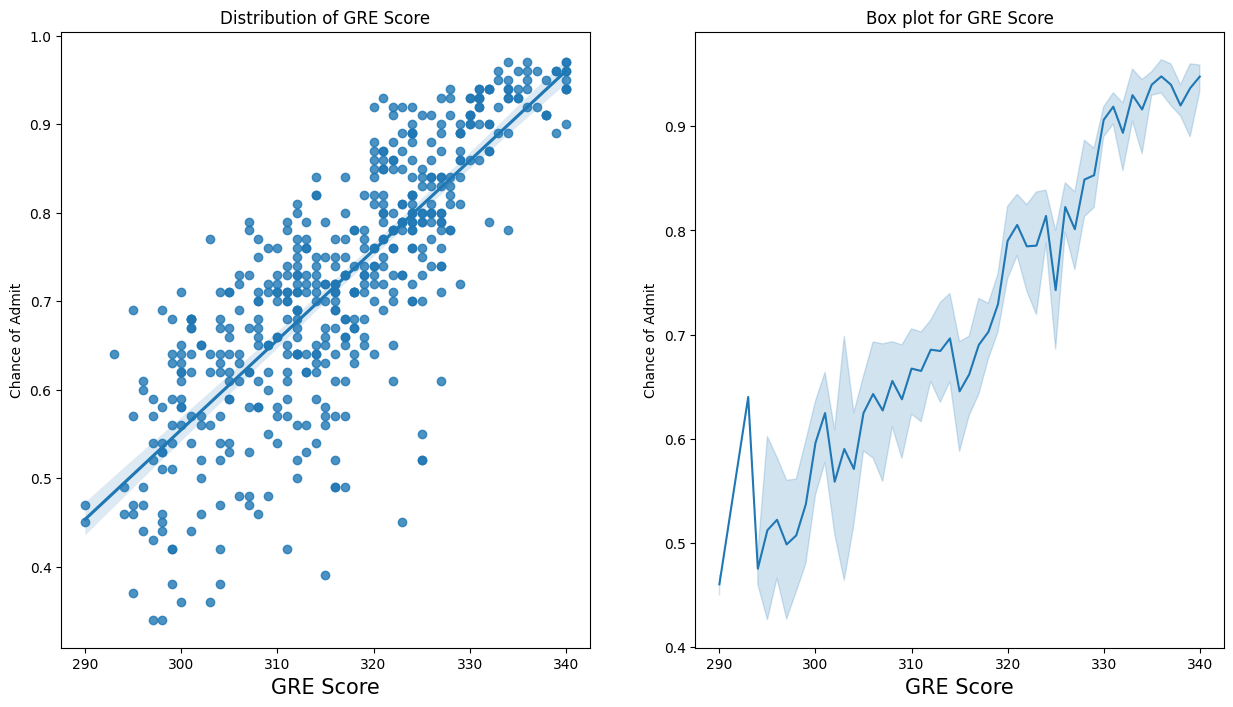

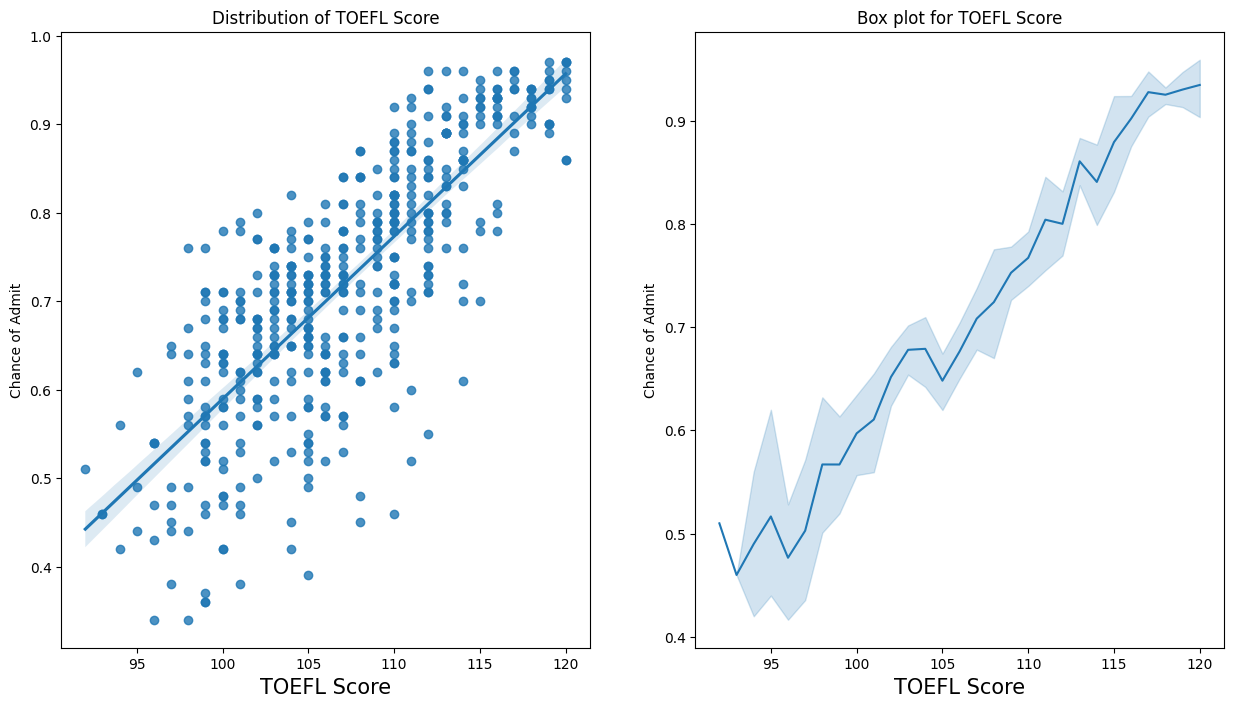

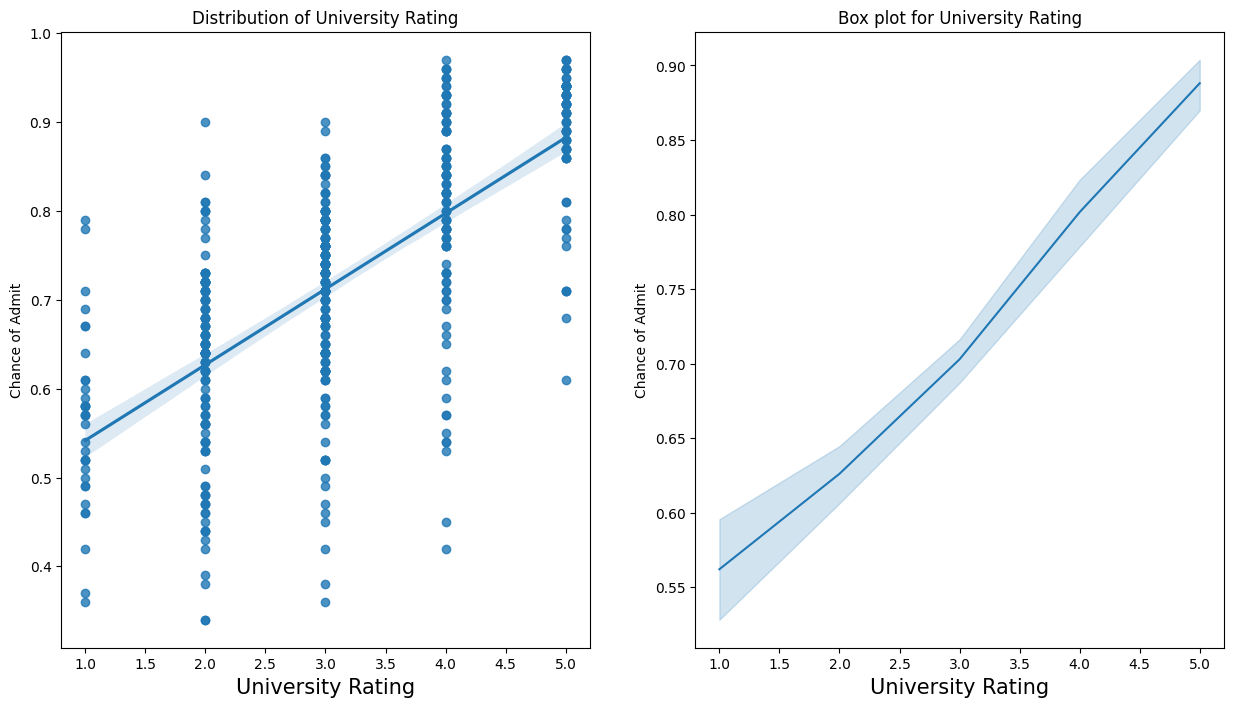

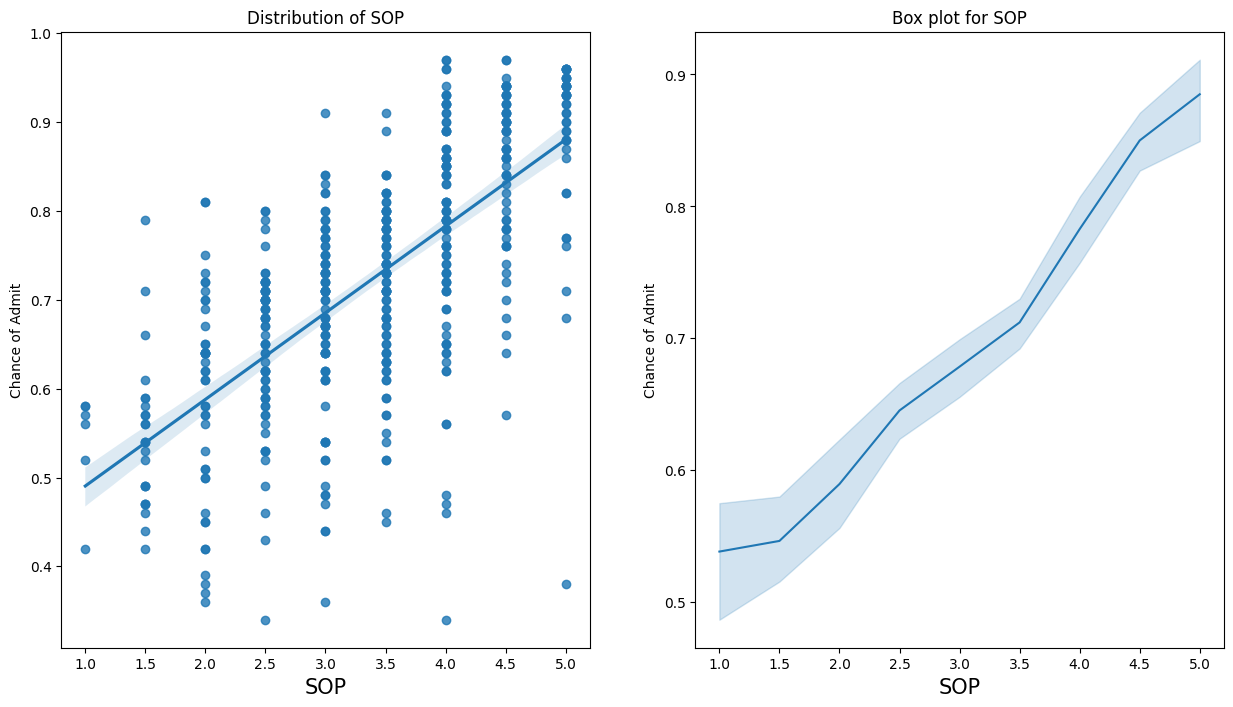

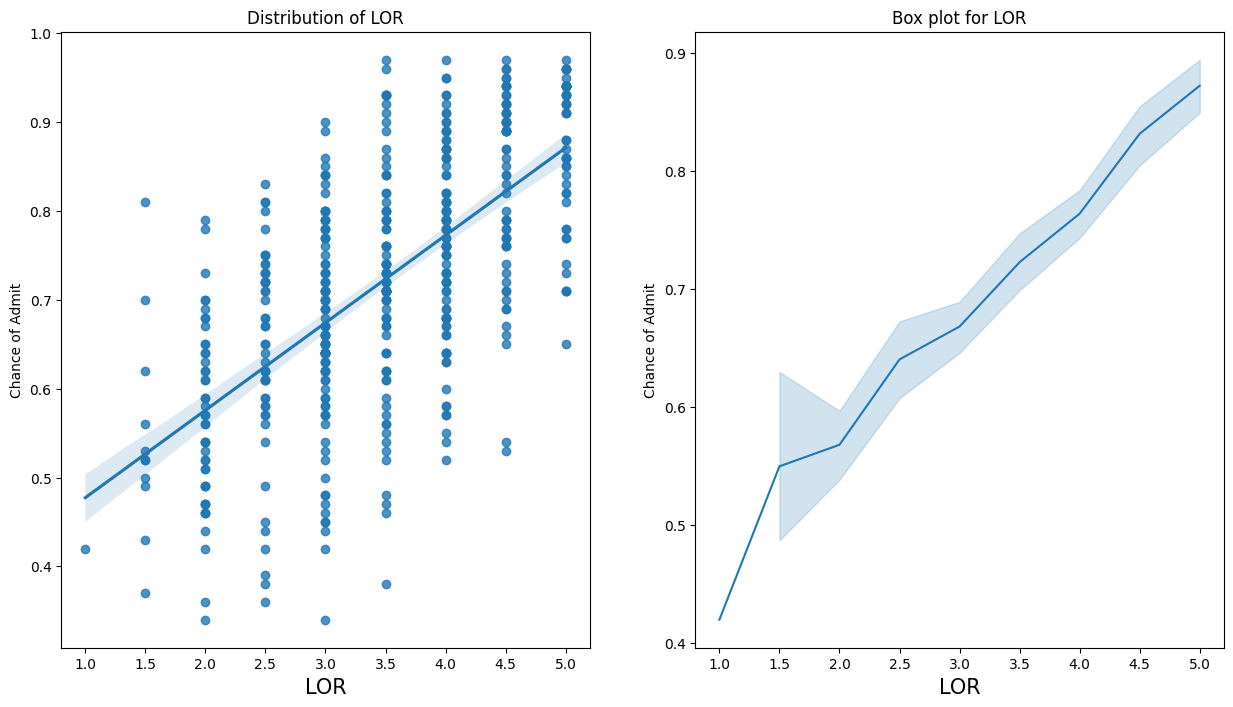

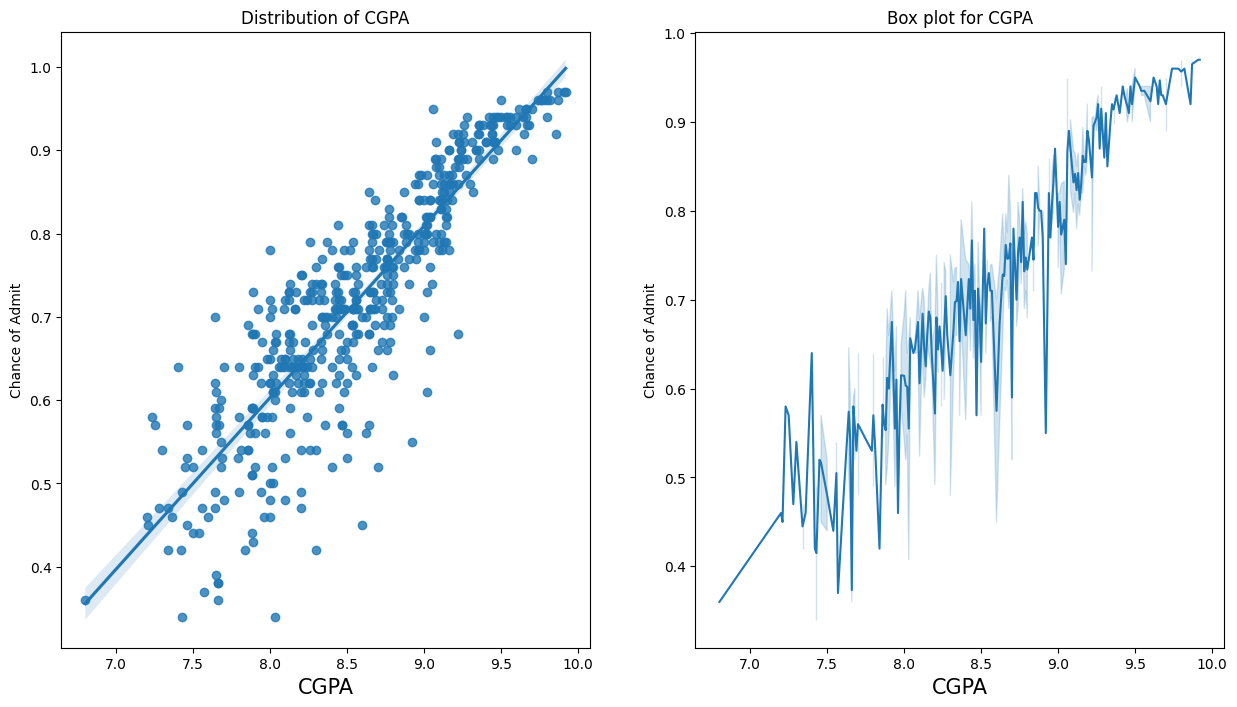

In [15]:
num_cat = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA"]
target_cat = "Chance of Admit"

for i in range(len(num_cat)):
    fig = plt.figure(figsize = (15, 8))

    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.set_title(f"Distribution of {num_cat[i]}")
    ax1.set_xlabel(ax1.get_xlabel(), fontsize = 15)
#     sns.histplot(data=jamboree, x=num_cat[i], ax=ax1, kde=True)
    sns.regplot(data=jamboree, ax=ax1, x=num_cat[i], y=target_cat)

    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.set_title(f"Box plot for {num_cat[i]}")
    ax2.set_xlabel(ax1.get_xlabel(), fontsize = 15)
#     sns.boxplot(data = jamboree, x=num_cat[i], ax=ax2)
    sns.lineplot(data=jamboree, x=num_cat[i], y=target_cat, ax=ax2)

plt.show()

- **GRE vs Chance of Admit Analysis**
    - There is linear relationship between GRE and Chance of Admission
    - Higher the GRE -> Higher the chance of admission
- **TOEFL vs Chance of Admit Analysis**
    - There is linear relationship between TOEFL and Chance of Admission
    - Higher the TOEFL -> Higher the chance of admission
- **LOR / SOP / University Rating vs Chance of Admit Analysis**
    - There is no significant linear relationship between TOEFL and Chance of Admission
- **CGPA vs Chance of Admit Analysis**
    - There is linear relationship between TOEFL and Chance of Admission
    - Higher the CGPA -> Higher the chance of admission

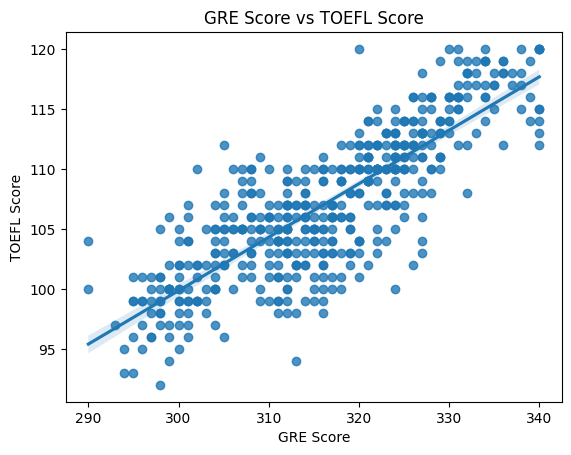

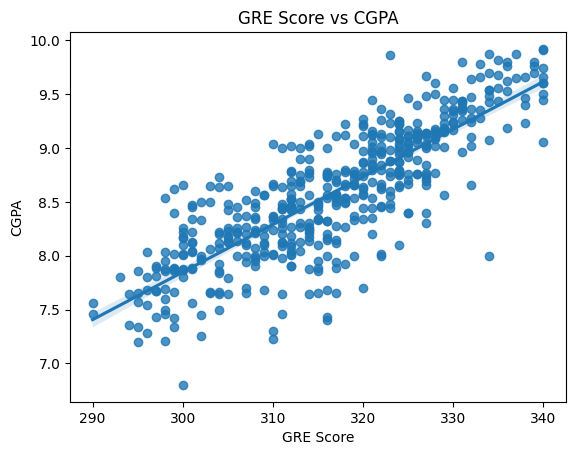

In [16]:
fig = sns.regplot(x="GRE Score",y="TOEFL Score",data=jamboree)
plt.title("GRE Score vs TOEFL Score")
plt.show()

fig = sns.regplot(x="GRE Score",y="CGPA",data=jamboree)
plt.title("GRE Score vs CGPA")
plt.show()

- **People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable**
- **Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working**

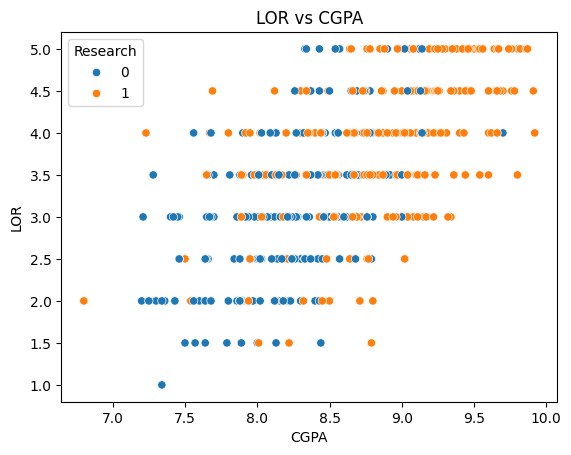

In [17]:
fig = sns.scatterplot(x="CGPA", y="LOR", data=jamboree, hue="Research")
plt.title("LOR vs CGPA")
plt.show()

- **LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence.**
- **Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs**

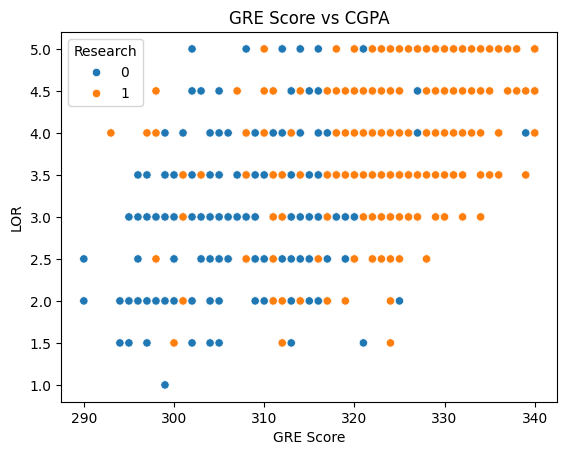

In [18]:
fig = sns.scatterplot(x="GRE Score", y="LOR", data=jamboree, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

- **GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores**

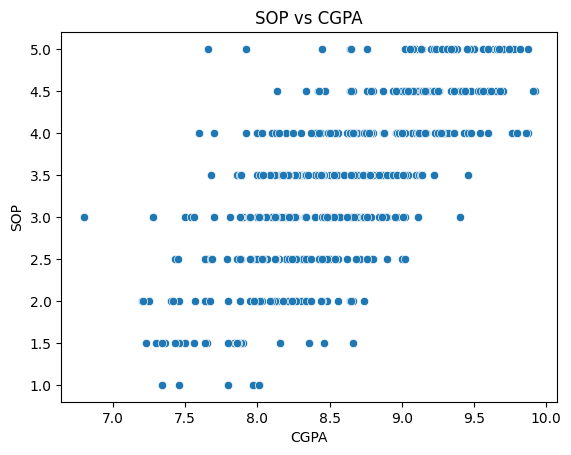

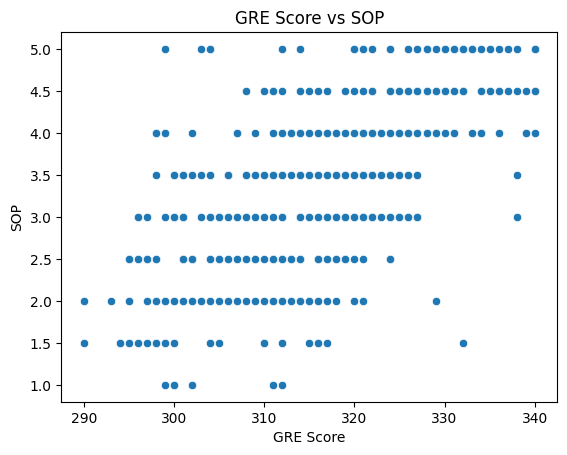

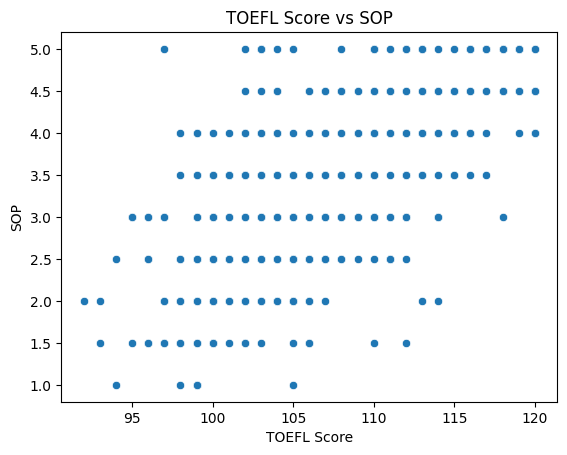

In [19]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=jamboree)
plt.title("SOP vs CGPA")
plt.show()

fig = sns.scatterplot(x="GRE Score", y="SOP", data=jamboree)
plt.title("GRE Score vs SOP")
plt.show()

fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=jamboree)
plt.title("TOEFL Score vs SOP")
plt.show()

- **CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight move towards higher CGPA as along with good SOPs**

- **Similary, GRE Score and SOP is only slightly related**

- **Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.**

# Correlation Analysis: Heat Map

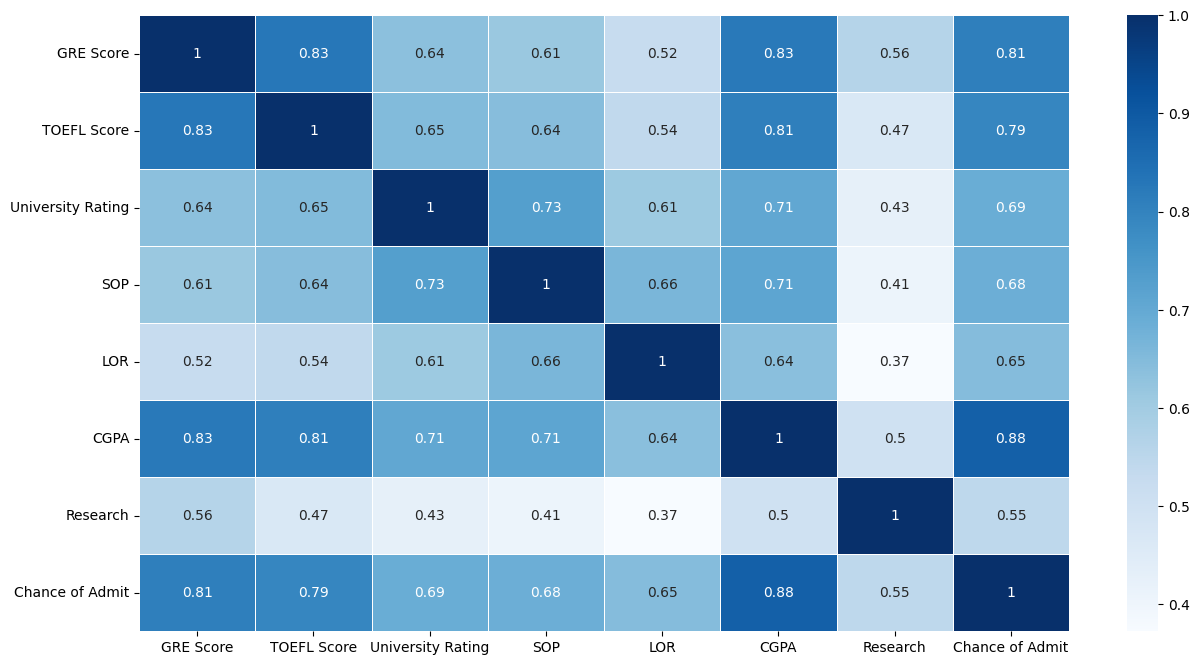

In [20]:
fig = plt.figure(figsize = (15, 8))
corr = jamboree.corr()
sns.heatmap(corr, linewidths=.5, annot=True, cmap="Blues")
plt.show()

- **High Correlation**
    1. GRE Score vs TOEFL Score
    2. CGPA vs TOEFL Score
    3. CGPA vs GRE Score
    4. Chance of Admit vs CGPA
    5. GRE Score vs Chance of Admit

# Data Preprocessing

# Duplicate Value Check

In [21]:
np.any(jamboree.duplicated())

False

# Missing Value Check

In [22]:
jamboree.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Outlier Check

In [23]:
for i in data.columns:
    print("======" * 10)
    print("Mean of {}: ".format(i), jamboree[i].mean())
    print("Median of {}: ".format(i), jamboree[i].median())

NameError: name 'data' is not defined

- **No outliers detected. As each and every feature overlaps its mean and median**

# Feature Engineering & Data Modelling

In [ ]:
from sklearn.model_selection import train_test_split

X = jamboree.drop(['Chance of Admit'], axis=1)
y = jamboree['Chance of Admit']

print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

# Train & Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

In [ ]:
X_train.head(5)

In [ ]:
y_train

# Feature standardization

In [ ]:
# Standarization
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

In [ ]:
X_train_std

In [ ]:
X_train = pd.DataFrame(data = X_train_std, columns = X_train_columns)
X_train.head(5)

# Model Building: Lin Reg, Lasso Reg, Ridge Reg

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

lm = LinearRegression()
lm.fit(X_train.values, y_train)
predictions = lm.predict(std.transform(X_test))
print("RMSE Linear Regression: ", np.sqrt(mean_squared_error(y_test, predictions)))
list(zip(X_train.columns, lm.coef_))

In [ ]:
lm = Lasso()
lm.fit(X_train.values, y_train)
predictions = lm.predict(std.transform(X_test))
print("RMSE Lasso Regression: ", np.sqrt(mean_squared_error(y_test, predictions)))
list(zip(X_train.columns, lm.coef_))

In [ ]:
lm = Ridge()
lm.fit(X_train.values, y_train)
predictions = lm.predict(std.transform(X_test))
print("RMSE Lasso Regression: ", np.sqrt(mean_squared_error(y_test, predictions)))
list(zip(X_train.columns, lm.coef_))

# Model Summary using stats model library

In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y.values,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

# Model 1

In [ ]:
X_train_new = build_model(X_train, y_train)

In [ ]:
checkVIF(X_train_new)

**Inference**
- p-vale of SOP seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [ ]:
X_train_new = X_train_new.drop(["SOP"], axis = 1)

# Model 2

In [ ]:
X_train_new = build_model(X_train_new, y_train)

In [ ]:
checkVIF(X_train_new)

In [ ]:
X_train_new = X_train_new.drop(["University Rating"], axis = 1)

**Inference**
- p-vale of University Rating seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

# MultiCollinearity Check using VIF

In [ ]:
checkVIF(X_train_new)

**Inferences**
- VIF looks fine and hence, we can go ahead with the predictions

In [ ]:
lm = sm.OLS(y_train.values,X_train_new).fit()
y_train_admit = lm.predict(X_train_new)

# Residual Analysis of the Model

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_admit), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)    # Plot heading
plt.show()

**Inferences**
- Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

# Mean of Residuals

In [ ]:
residuals = (y_train - y_train_admit)
np.mean(residuals)

In [ ]:
X_train_new = X_train_new.drop('const',axis=1)

**Mean of Residuals: `-0.00277305161296889`**

In [ ]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(std.fit_transform(X_test_new))
# Making predictions
y_pred = lm.predict(X_test_new)

# Linearity of Variables: Residual Plot

In [ ]:
for i in X_train_new.columns:
    plt.figure(figsize = (15, 8))
    sns.residplot(x=X_train_new[i], y=y_train_admit)

# Test for Homoscedasticity

In [ ]:
residuals = y_test - y_pred
p = sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
# plt.ylim(-0.4,0.4)
# plt.xlim(0,1)

In [ ]:
import statsmodels.stats.api as sas
from statsmodels.compat import lzip
name=['F statistics','p-value']
test=sas.het_goldfeldquandt(residuals,X_test)
lzip(name,test)

**Inferences**
- Here null hypothesis is - error terms are homoscedastic and since p-values >0.05, we fail to reject the null hypothesis

# Normality of Residual

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

**Inferences**
- y_test and y_pred overlaps for the most of the datapoints

In [ ]:
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Distribution of Residuals', fontsize = 20)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(residuals, line = "r")
plt.show()

**Inferences**
- QQ Plots suggest majority of the data points fit the regression line.

# Model performance evaluation

# Metrics checked - MAE, RMSE, R2, Adj R2

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print("======" * 10)
print('Mean Absolute Error: ',mean_absolute_error(y_test.values,pred))
print("======" * 10)
print('Root Mean Square Error: ',np.sqrt(mean_squared_error(y_test.values,pred)))
print("======" * 10)
r2Score = r2_score(y_test, y_pred)
print('R2 Score: ', r2Score)
print("======" * 10)
aR2Score = 1 - (1-r2Score/(len(y_test)-X_test_new.shape[1]-1))
print('Adjusted. R2 Score: ', r2Score)
print("======" * 10)

# Performance test Train & Test Dataset

In [ ]:
print("======" * 10)
Trainr2Score = r2_score(y_train, y_train_admit)
print('Train R2 Score: ', Trainr2Score)
print("======" * 10)
Testr2Score = r2_score(y_test, y_pred)
print('Test R2 Score: ', Testr2Score)

In [ ]:
print(lm.summary())

# Actionable Insights and Recommendations

1. R-sqaured and Adjusted R-squared (extent of fit) - 0.83 and 0.82 - 85% variance explained.
2. F-stats and Prob(F-stats) (overall model fit) - 387.9 and 1.03e-149(approx. 0.0) - Model fit is significant and explained 82% variance is just not by chance.
3. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.
4. There is lot of chance for the model improvement by tunining the parameters.
5. Currently this models attains accuracy around 80%. This can be improved further by doing some feature engg.
6. As the dataset is strictly provided for the Indian perspective. This model is not generalized, there is scope for the generalization of this model.
7. LogLikelihood is around 570 which indicates model is significantly fit.
8. Performance of trainning and test data is almost same indicates the model will work significantly on unseen data.
9. While observing the model and according to test assumptions - We can infer errors are homoscedasticity according to p-value
10. While observing the linearity of residual there is no significant pattern found which indicates the residual plots are not correlated
11. While observing the normality of residual - the distribution resembles like bell-shaped and the reg. line fits almost every point